<a href="https://colab.research.google.com/github/n28neeraj/TImeSeries_Tutorial/blob/master/Time_Series_Tutorial_AR_MA_ARMA_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock price**
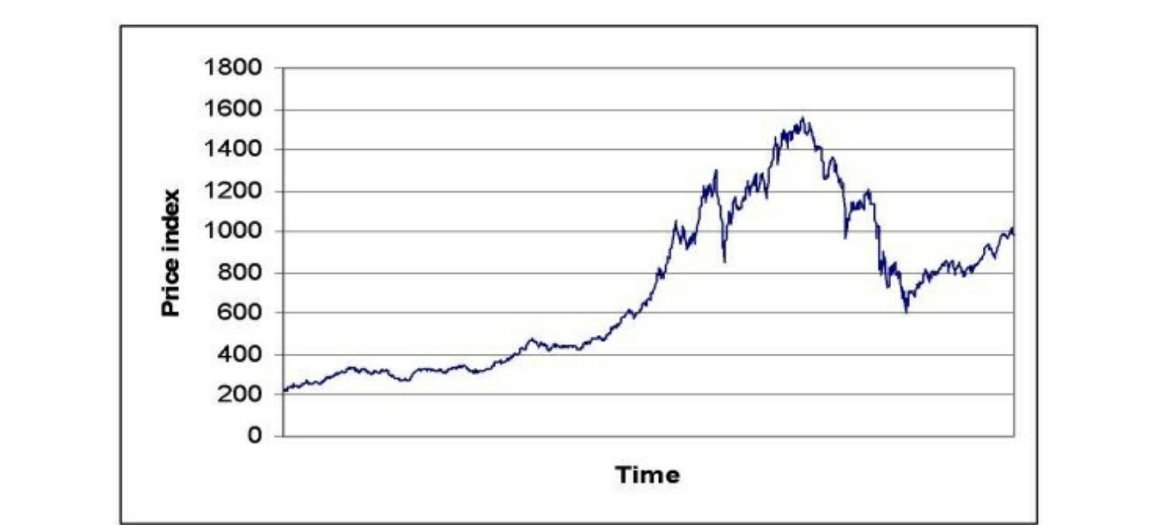

**Passenger count of an airline**
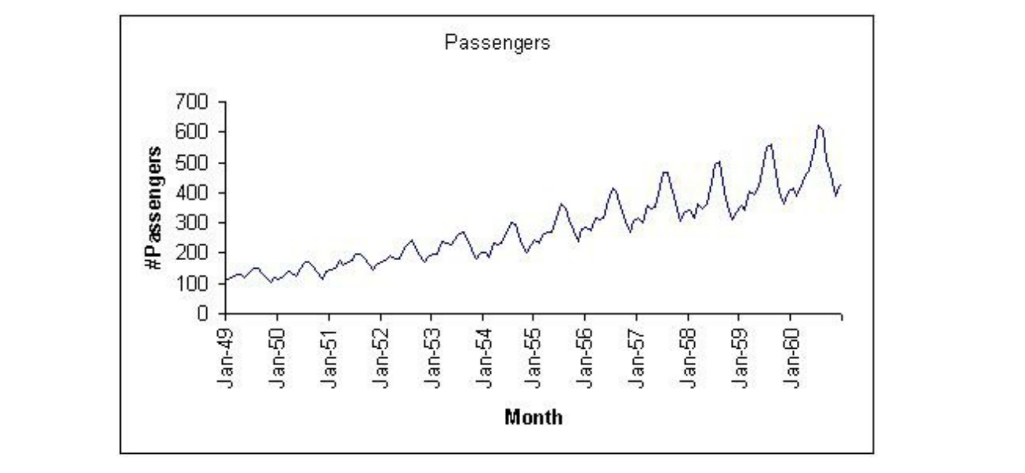

**Temperature over time**
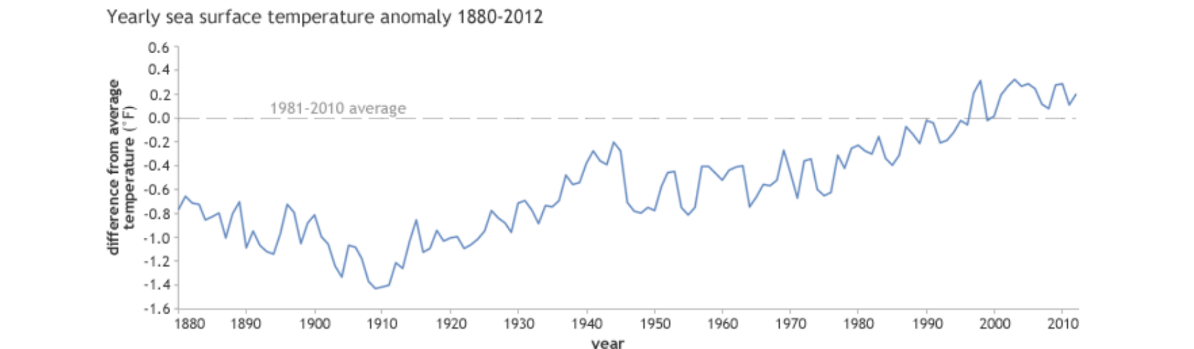

**Various components of time series**
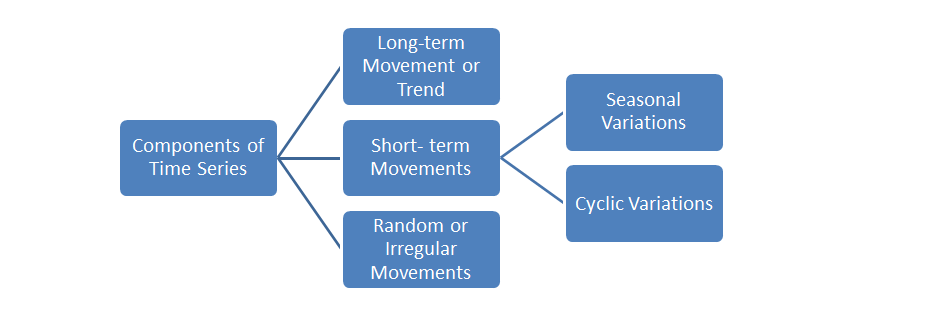

**Loading and Handling Time Series in Pandas**

In [65]:
import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/


In [66]:
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/n28neeraj/TImeSeries_Tutorial/master/AirPassengers.csv')

In [68]:
# from google.colab import files
# uploaded = files.upload()

In [69]:
# from google.colab import drive
# drive.mount('/content/drive')

In [70]:
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AirPassengers.csv')


In [71]:
# data = pd.read_csv('AirPassengers.csv')

In [72]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [73]:
# Datatypes
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [74]:
# Index
data.index

RangeIndex(start=0, stop=144, step=1)

In [75]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [76]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [77]:
#specific to the index


In [78]:
#For range


In [79]:
#if one index is at the end


In [80]:
#All rows of 1949



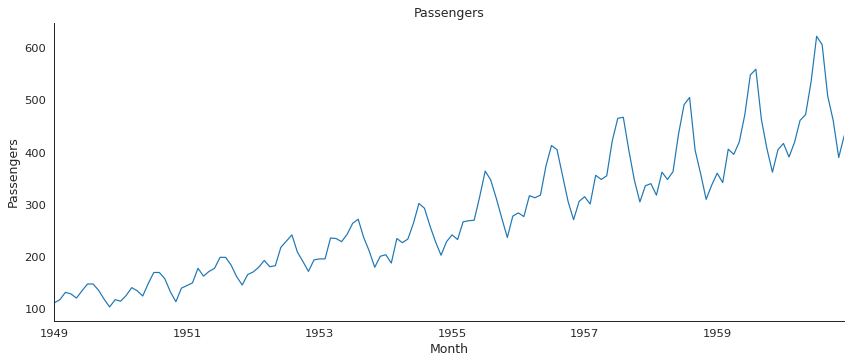

In [81]:
#Passenger PLOT
data.plot(figsize=(12,5))
plt.ylabel('Passengers')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Passengers')
sns.despine(top=True)
plt.show()

In [82]:
month_arr = []
year_arr = []
year = 1949
indexCol = []
for i in range(len(data['#Passengers'])):
  year_arr.append(year)
  indexCol.append(i+1)
  if((i+1)%12>0):
    month_arr.append((i+1)%12)
  else:
    month_arr.append(12)
    year = year + 1

In [83]:
data['Month_num'] = month_arr
data['Year_num'] = year_arr
data['indexCol'] = indexCol

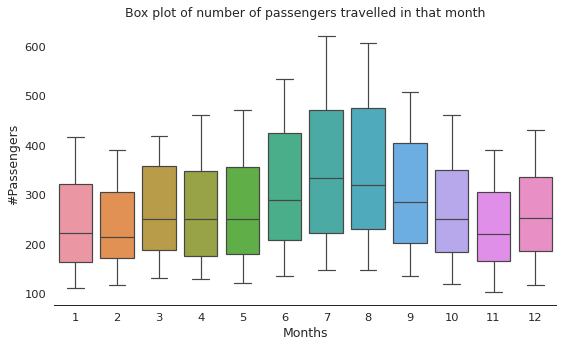

In [84]:
#Box plot 
plt.figure(figsize=(8,5))
sns.boxplot(x="Month_num", y="#Passengers", data=data)
plt.xlabel('Months')
plt.title('Box plot of number of passengers travelled in that month')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_monthly.pdf', dpi=1400)
plt.show()

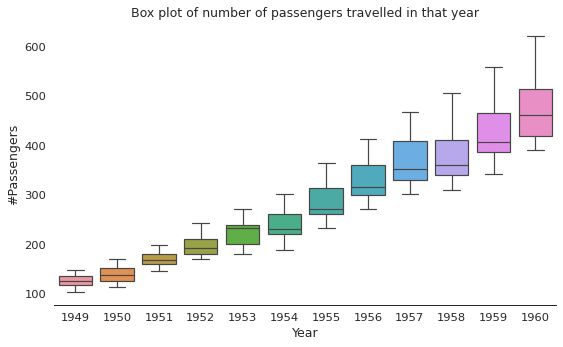

In [85]:
#Box plot 
plt.figure(figsize=(8,5))
sns.boxplot(x="Year_num", y="#Passengers", data=data)
plt.xlabel('Year')
plt.title('Box plot of number of passengers travelled in that year')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_year.pdf', dpi=1400)
plt.show()

We can also calculate Kurtosis and Skewness, to determine if the data distribution departs from the normal distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: -0.39377217091281036
Skewness of normal distribution: 0.577068234901525


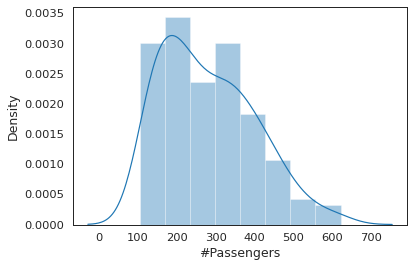

In [86]:
sns.distplot(data['#Passengers']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['#Passengers'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['#Passengers'])))

**Kurtosis**: describes heaviness of the tails of a distribution

**Skewness**: measures asymmetry of the distribution


define the number of test data and divide complete dataset into test and train


In [87]:
number_of_test = 24

no_of_train = len(data['#Passengers'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['#Passengers'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['#Passengers'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

**STATIONARITY** (**But why is it important?**)

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

*   **constant mean**
*   **constant variance**
* **an auto co-variance that does not depend on time**

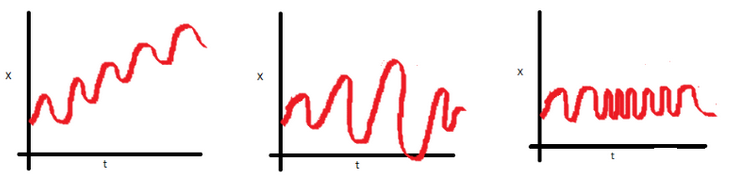



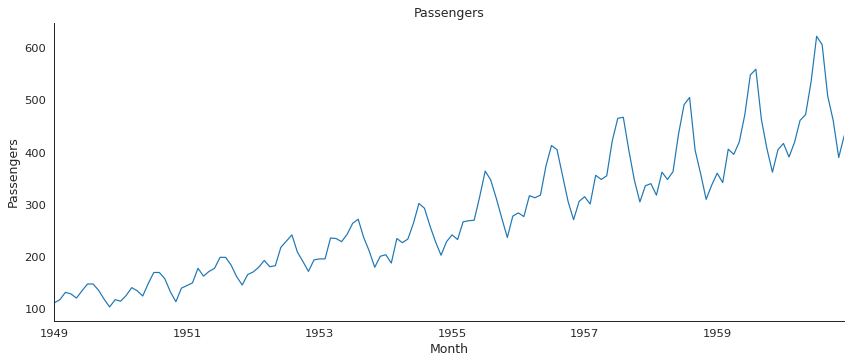

In [88]:
#Passenger PLOT
data['#Passengers'].plot(figsize=(12,5))
plt.ylabel('Passengers')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Passengers')
sns.despine(top=True)
plt.show()

It’s clear from the plot that there is an overall upward trend,with some seasonality in it

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

**Dickey-fuller Test** :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, i.e. we can reject the null hypothesis and say that this Time series is indeed stationary

**Results of ADF test**: The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.


**Test for stationarity**: If the test statistic is less than the critical value, we can reject the null hypothesis (i.e the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In [89]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

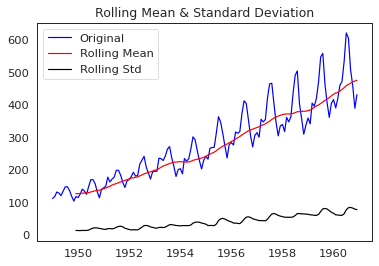

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [90]:
test_stationarity(data['#Passengers'])

This is not stationary because :

*   mean is increasing even though the std is small
*   Test stat is > critical value


4.  **MAKING THE TIME SERIES STATIONARY**

There are two major factors that make a time series non-stationary. They are:


*   **Trend**: non-constant mean
*   **Seasonality**: Variation at specific time-frames


The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated



**Trend**

The first step is to reduce the trend using transformation, as we can see from the previous plots that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation

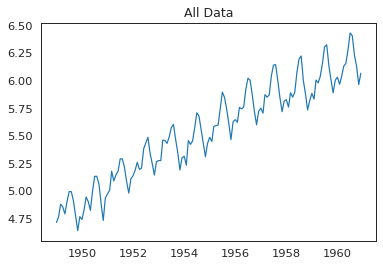

In [91]:
all_data_log = np.log(data['#Passengers'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()



**Smoothing:** In smoothing we usually take the past few instances (rolling estimates). **Moving average** method is most common method of smoothing. In this, first take x consecutive values and this depends on the frequency if it is 1 year we take 12 values.

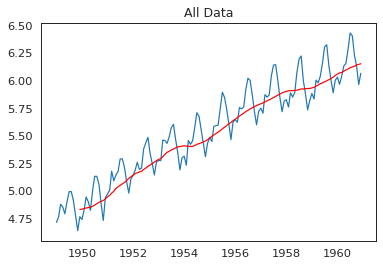

In [92]:

moving_avg = all_data_log.rolling(window=12).mean()
plt.plot(all_data_log)
plt.title("All Data")
plt.plot(moving_avg,color='red')
plt.show()



In [93]:
ts_log_moving_avg_diff = all_data_log - moving_avg
print(ts_log_moving_avg_diff)
ts_log_moving_avg_diff.head(24)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
Name: #Passengers, dtype: float64

In [94]:
# remove all NaN fields
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Let's check for stationarity

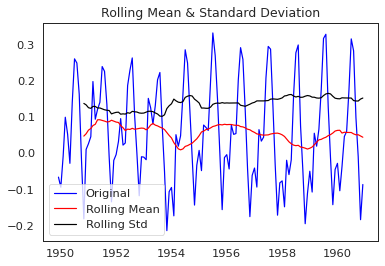

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [95]:
# plot original vs rolling mean vs rolling standard deviation of the difference obtained above
test_stationarity(ts_log_moving_avg_diff)

Here, we notice two things:

*   The rolling values are varying slightly but there is no specific trend
*   The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary



**Seasonality (along with Trend)**
Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:


*  **Differencing**: by taking difference using time lag
*   **Decomposition**: model both trend and seasonality, then remove them



**Differencing**:


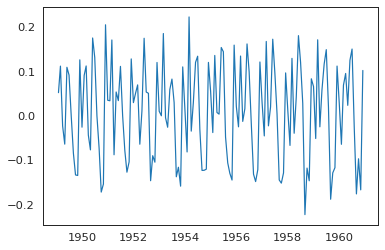

In [96]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

Let’s  check stationarity 

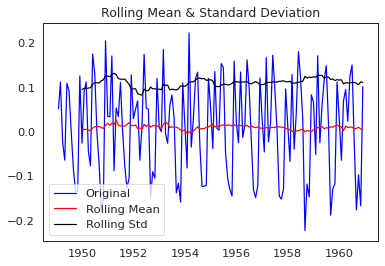

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [97]:
#remove Nan from obtained differenced series 
# and plot the original versus rolling mean verss rolling standard deviation
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

It is stationary because:

*   the mean and std variations have small variations with time
*   test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary



**Decomposing**:
Here we model both the trend and the seasonality, then the remaining part of the time series is returned

In [98]:
#polpulate the index column
no_ALL_Data = len(all_data_log)
print(no_ALL_Data)
indexCol = []
for i in range (no_ALL_Data):
    indexCol.append(i+1)
df_All_Data = pd.DataFrame()
df_All_Data['0'] = indexCol
df_All_Data['W'] = data['#Passengers'][:no_ALL_Data]

144


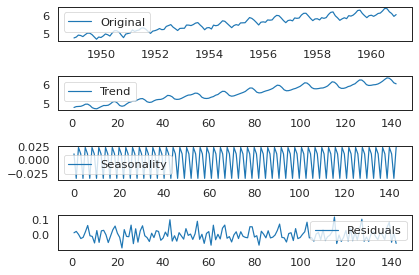

In [99]:
#Decomposition of logarithm of data into trend, seasonality and residuals


decomposed = seasonal_decompose(np.asarray(all_data_log), freq=3)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.subplot(411)
plt.plot(all_data_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


In [100]:
# divide the differenced series into train and test
df_train['W_diff'] = ts_log_diff[0:no_of_train]
df_test['W_diff'] = ts_log_diff[no_of_train:]
data['W_diff'] = ts_log_diff

Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

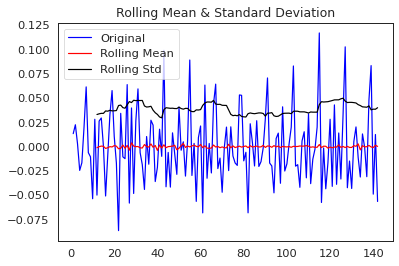

Results of Dickey-Fuller Test:
Test Statistic                -8.397413e+00
p-value                        2.279195e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [101]:
#Store the residual series and plot it's rolling mean and rolling standard deviation
df_temp = pd.DataFrame()
df_temp['W'] = residual
df_temp['W'].dropna(inplace = True)
ts_log_decompose = df_temp['W']
test_stationarity(ts_log_decompose.dropna())

This is stationary because:

*   test statistic is lower than 1% critical values
*   the mean and std variations have small variations with time



In [102]:
# import pandas as pd
# import numpy as np
# import matplotlib.pylab as plt
# %matplotlib inline
# from pandas import Series
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from math import sqrt
# from numpy import mean
# from pandas import DataFrame
# from sklearn.metrics import mean_squared_error
# from matplotlib import pyplot
# import pandas as pd
# import statsmodels
# import numpy as np
# from statsmodels.tsa.stattools import adfuller
# from matplotlib import pyplot as plt
# import statsmodels.api
# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib.pyplot import figure
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import acf, pacf

# from statsmodels.tsa.arima_model import ARMA

# from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# import seaborn as sns
# sns.set_context("paper", font_scale=1.3)
# sns.set_style('white')
# from datetime import datetime


In [103]:
data['W_diff'] = ts_log_diff
data['W_diff'].dropna(inplace=True)
normalized = data['W_diff'].values
normalized1d=[]
for i in range(1,len(normalized)):
    normalized1d.append(normalized[i])

# Correlation, Autocorrelation (ACF), Partial autocorrelation (PACF) 

**Autocorrelation (ACF):**

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series.

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example, $r_1$ measures the relationship between $y_t$ and $y_{t−1}$, $r_2$ measures the relationship between $y_t$ and $y_{t−2}$, and so on.


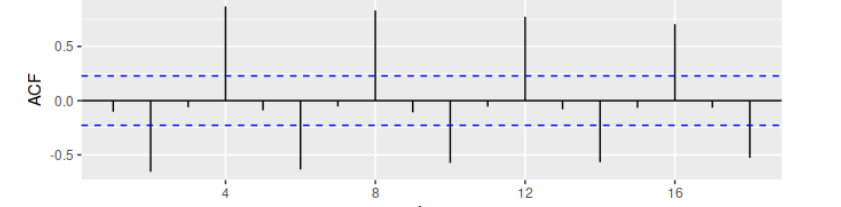





**PACF**


 > Partial Autocorrelation is finding the correlation between present$(x_t)$ and random lags value $(x_{t-h})$. Hence, the correlation in the middle values like $(x_{t-1}), (x_{t-2}), (x_{t-3}) ... (x_{t-(h-1)})$ will not be taken into account.

In [104]:
# from google.colab import drive
# drive.mount('/content/drive')

In [105]:


temperature_df = pd.read_csv('https://raw.githubusercontent.com/n28neeraj/TImeSeries_Tutorial/master/daily-Minimum-temperature.csv', header=0, index_col=0)

rob_df = pd.read_csv('https://raw.githubusercontent.com/n28neeraj/TImeSeries_Tutorial/master/monthly-robberies.csv', header=0, index_col=0)

water_usage_df = pd.read_csv('https://raw.githubusercontent.com/n28neeraj/TImeSeries_Tutorial/master/yearly-water-usage.csv', header=0, index_col=0)


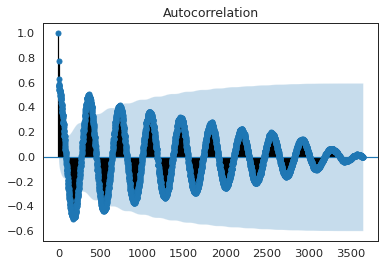

In [106]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temperature_df, lags=len(temperature_df)-1)
plt.show()

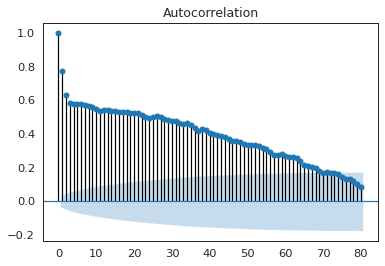

In [107]:
plot_acf(temperature_df, lags=80)
plt.show()

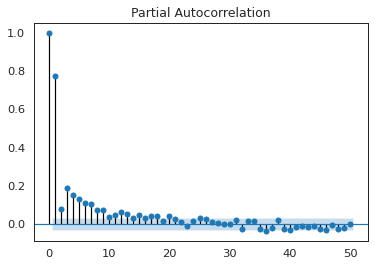

In [108]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temperature_df, lags=50)
pyplot.show()

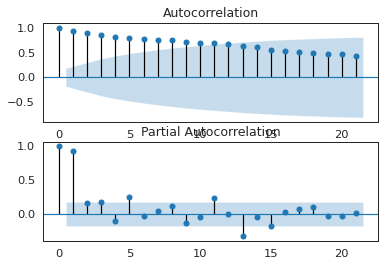

In [109]:
# ACF and PACF on robbery dataset
pyplot.figure()
pyplot.subplot(211)
plot_acf(rob_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(rob_df, ax=pyplot.gca())
pyplot.show()

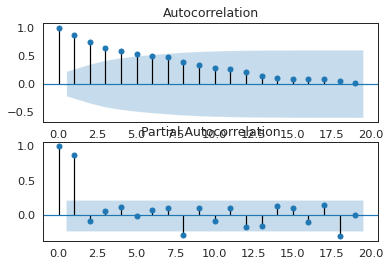

In [110]:
# ACF and PACF on the water usage dataset
pyplot.figure()
pyplot.subplot(211)
plot_acf(water_usage_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(water_usage_df
          , ax=pyplot.gca())
pyplot.show()

# **Forecasting a time series**



Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model 

Where,


*   p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3)
*   q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3)
* d :This is the number of differences or the number of non-seasonal differences




/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


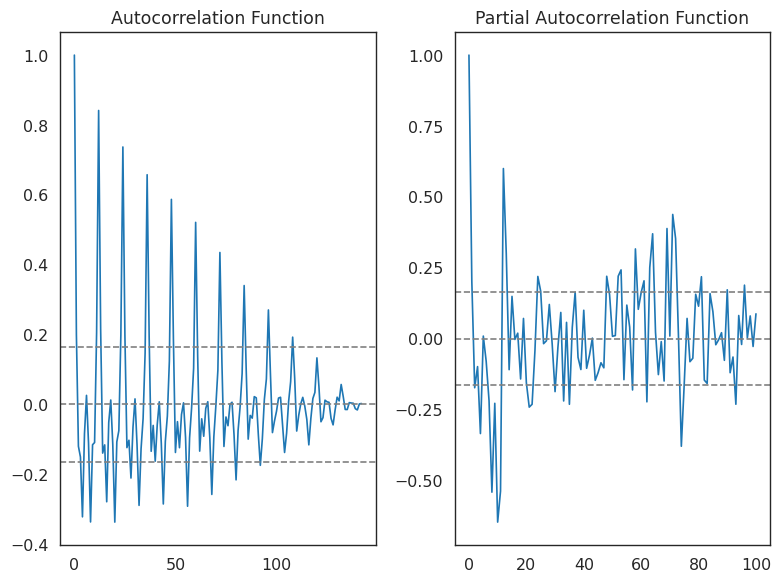

In [111]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 200)
lag_pacf = pacf(ts_log_diff, nlags = 100, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


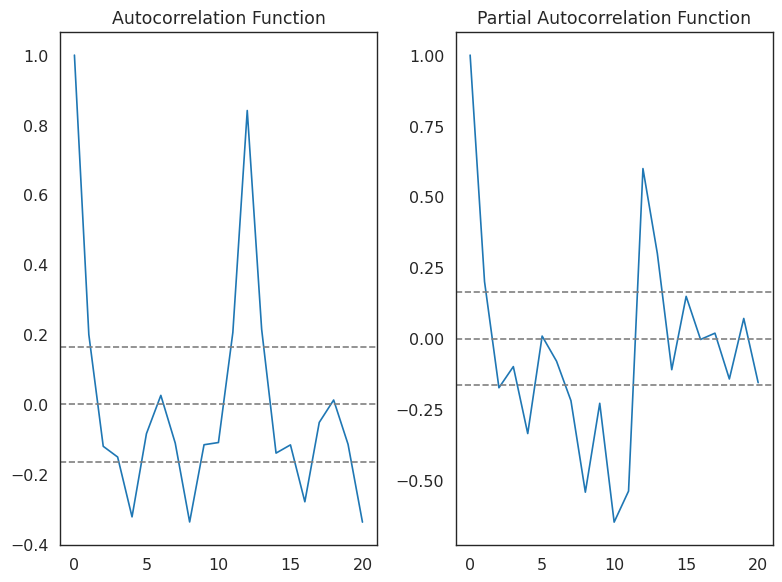

In [112]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#AR


from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=-1, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i][0])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inversed_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inversed_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.000665, expected=360.000000
counter=2.000000, predicted=361.000281, expected=342.000000
counter=3.000000, predicted=343.000446, expected=406.000000
counter=4.000000, predicted=407.127249, expected=396.000000
counter=5.000000, predicted=396.985376, expected=420.000000
counter=6.000000, predicted=421.089397, expected=472.000000
counter=7.000000, predicted=473.067820, expected=548.000000
counter=8.000000, predicted=549.124652, expected=559.000000
counter=9.000000, predicted=560.066025, expected=463.000000
counter=10.000000, predicted=463.939029, expected=407.000000
counter=11.000000, predicted=407.915854, expected=362.000000
counter=12.000000, predicted=362.869211, expected=405.000000
counter=13.000000, predicted=406.018416, expected=417.000000
counter=14.000000, predicted=417.993048, expected=391.000000
counter=15.000000, predicted=391.997747, expected=419.000000
counter=16.000000, predicted=420.046142, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

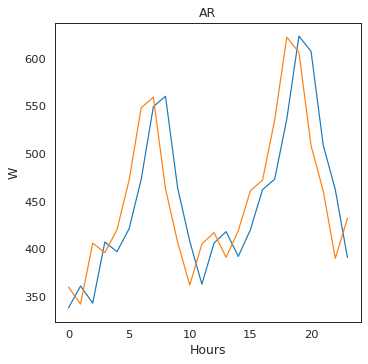

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inversed_pred)
plt.plot(inversed_test)

axarr.set_title('AR')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
#MA

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))

inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.000665, expected=360.000000
counter=2.000000, predicted=361.000281, expected=342.000000
counter=3.000000, predicted=343.000446, expected=406.000000
counter=4.000000, predicted=407.127249, expected=396.000000
counter=5.000000, predicted=396.985376, expected=420.000000
counter=6.000000, predicted=421.089397, expected=472.000000
counter=7.000000, predicted=473.067820, expected=548.000000
counter=8.000000, predicted=549.124652, expected=559.000000
counter=9.000000, predicted=560.066025, expected=463.000000
counter=10.000000, predicted=463.939029, expected=407.000000
counter=11.000000, predicted=407.915854, expected=362.000000
counter=12.000000, predicted=362.869211, expected=405.000000
counter=13.000000, predicted=406.018416, expected=417.000000
counter=14.000000, predicted=417.993048, expected=391.000000
counter=15.000000, predicted=391.997747, expected=419.000000
counter=16.000000, predicted=420.046142, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

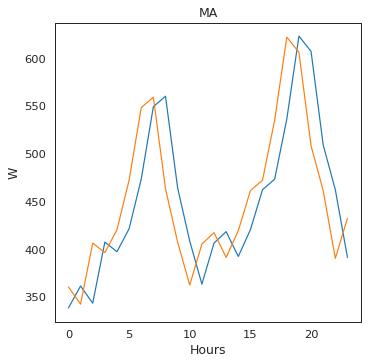

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('MA')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
# ARMA 
size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.predict(len(history),len(history))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.045120, expected=360.000000
counter=2.000000, predicted=360.999837, expected=342.000000
counter=3.000000, predicted=342.977020, expected=406.000000
counter=4.000000, predicted=407.045893, expected=396.000000
counter=5.000000, predicted=396.967243, expected=420.000000
counter=6.000000, predicted=421.015551, expected=472.000000
counter=7.000000, predicted=473.014588, expected=548.000000
counter=8.000000, predicted=549.014230, expected=559.000000
counter=9.000000, predicted=559.981854, expected=463.000000
counter=10.000000, predicted=463.957135, expected=407.000000
counter=11.000000, predicted=408.003363, expected=362.000000
counter=12.000000, predicted=362.993016, expected=405.000000
counter=13.000000, predicted=406.046089, expected=417.000000
counter=14.000000, predicted=417.988020, expected=391.000000
counter=15.000000, predicted=391.980754, expected=419.000000
counter=16.000000, predicted=420.026360, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

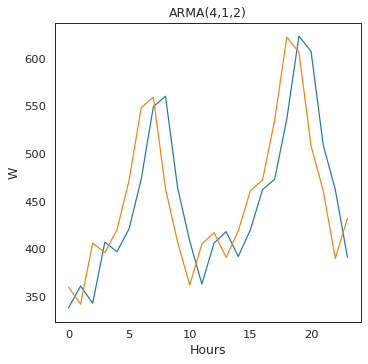

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('ARMA(4,1,2)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
#ARIMA
size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.067815, expected=360.000000
counter=2.000000, predicted=360.990989, expected=342.000000
counter=3.000000, predicted=343.005817, expected=406.000000
counter=4.000000, predicted=407.065698, expected=396.000000
counter=5.000000, predicted=396.967440, expected=420.000000
counter=6.000000, predicted=421.062869, expected=472.000000
counter=7.000000, predicted=473.011729, expected=548.000000
counter=8.000000, predicted=549.055135, expected=559.000000
counter=9.000000, predicted=559.990330, expected=463.000000
counter=10.000000, predicted=463.979748, expected=407.000000
counter=11.000000, predicted=408.006202, expected=362.000000
counter=12.000000, predicted=362.984763, expected=405.000000
counter=13.000000, predicted=406.068639, expected=417.000000
counter=14.000000, predicted=417.984327, expected=391.000000
counter=15.000000, predicted=392.014467, expected=419.000000
counter=16.000000, predicted=420.034392, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

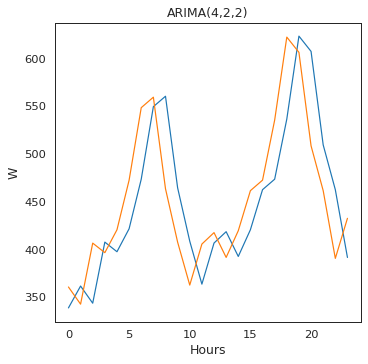

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,2,2)')
plt.xlabel('Hours')
plt.ylabel('W')

In [113]:
# Optimize ARIMA parameters
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(ts_log_diff, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

0 1 1 -222.8063042028889
0 1 2 -229.8447721260278
0 1 3 -231.0551156250267
1 1 0 -173.7657904295104
2 1 0 -183.34735928634217
2 1 1 -223.39500377974065
2 1 2 -229.47801271892172
3 1 0 -180.3400953253224
3 1 1 -220.51753249081753
3 1 2 -220.92611940928134


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

4 1 0 -198.91679762459222
4 1 1 -220.30044182017667
4 1 2 -227.10259876180243
4 1 4 -264.39282752855536
0 2 1 -153.09776819319285
1 2 0 -76.05395234523039
2 2 0 -114.13704773423581


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

3 2 0 -114.9265469704959
4 2 0 -128.94551712112684
4 2 2 -213.54546809277258


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [114]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(ar,d,ma))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    

smallest aic val=-264.000000, ar=4.000000, d=1.000000, ma=4.000000 


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [116]:

temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [117]:

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.060169, expected=360.000000
counter=2.000000, predicted=361.035357, expected=342.000000
counter=3.000000, predicted=343.076625, expected=406.000000
counter=4.000000, predicted=407.018856, expected=396.000000
counter=5.000000, predicted=396.947140, expected=420.000000
counter=6.000000, predicted=421.070603, expected=472.000000
counter=7.000000, predicted=472.958631, expected=548.000000
counter=8.000000, predicted=548.959896, expected=559.000000
counter=9.000000, predicted=560.000430, expected=463.000000
counter=10.000000, predicted=463.881887, expected=407.000000
counter=11.000000, predicted=407.957169, expected=362.000000
counter=12.000000, predicted=363.070313, expected=405.000000
counter=13.000000, predicted=406.060838, expected=417.000000
counter=14.000000, predicted=418.012387, expected=391.000000
counter=15.000000, predicted=392.067586, expected=419.000000
counter=16.000000, predicted=420.017564, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

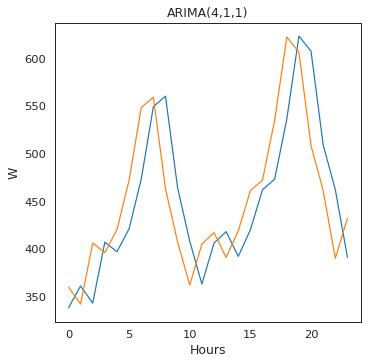

In [118]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,1,1)')
plt.xlabel('Hours')
plt.ylabel('W')